In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CLaMP\\ClaMP_Integrated-5184.csv") #DM--> Dataset Malware

In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_cblp                       5210 non-null   int64  
 1   e_cp                         5210 non-null   int64  
 2   e_cparhdr                    5210 non-null   int64  
 3   e_maxalloc                   5210 non-null   int64  
 4   e_sp                         5210 non-null   int64  
 5   e_lfanew                     5210 non-null   int64  
 6   NumberOfSections             5210 non-null   int64  
 7   CreationYear                 5210 non-null   int64  
 8   FH_char0                     5210 non-null   int64  
 9   FH_char1                     5210 non-null   int64  
 10  FH_char2                     5210 non-null   int64  
 11  FH_char3                     5210 non-null   int64  
 12  FH_char4                     5210 non-null   int64  
 13  FH_char5          

In [4]:
# Memisahkan data benign dan data malware
BenignData = DM[DM['class'] == 0]  # 0 represents Benign
MalwareData = DM[DM['class'] == 1]  # 1 represents Malicious

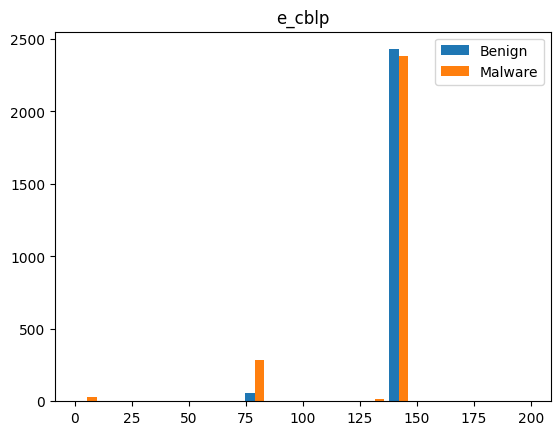

In [5]:
# Histogram penyebaran data benign dan malware pada fitur Fine name.
x = BenignData["e_cblp"]
y = MalwareData["e_cblp"]
bins = np.linspace(0, 200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_cblp")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

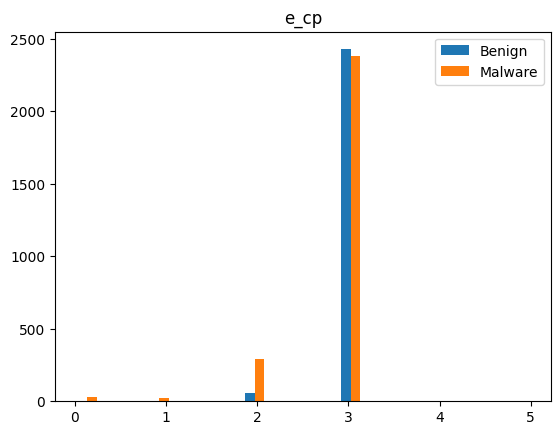

In [6]:
# Histogram penyebaran data benign dan malware pada fitur e_cp.
x = BenignData["e_cp"]
y = MalwareData["e_cp"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_cp")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

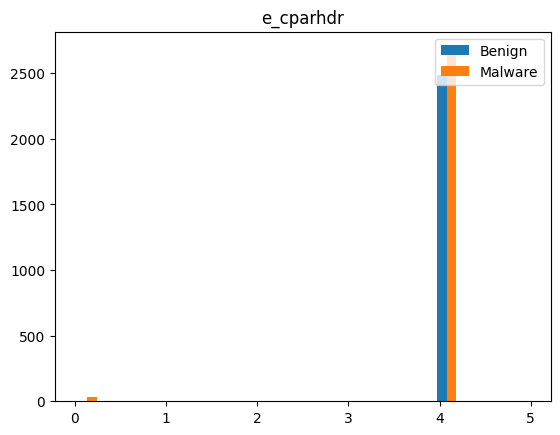

In [7]:
# Histogram penyebaran data benign dan malware pada fitur e_cparhdr.
x = BenignData["e_cparhdr"]
y = MalwareData["e_cparhdr"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_cparhdr")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

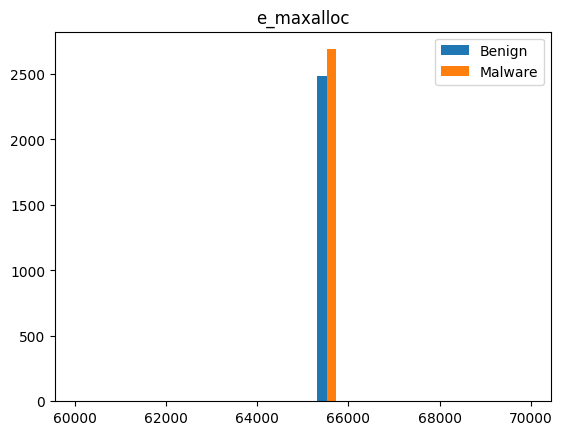

In [8]:
# Histogram penyebaran data benign dan malware pada fitur e_maxalloc.
x = BenignData["e_maxalloc"]
y = MalwareData["e_maxalloc"]
bins = np.linspace(60000, 70000, 20) # Berbeda karena mayoritas data bernilai 60000 sampai 70000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_maxalloc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

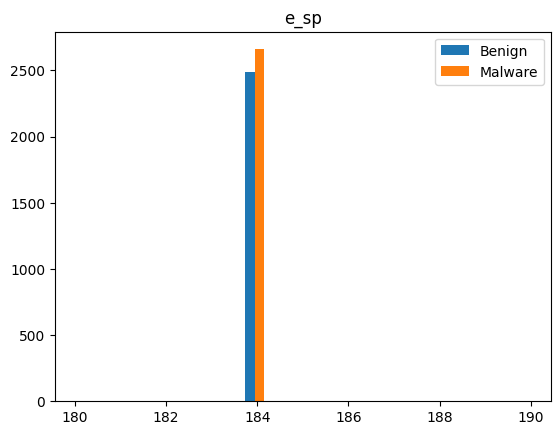

In [9]:
# Histogram penyebaran data benign dan malware pada fitur e_sp.
x = BenignData["e_sp"]
y = MalwareData["e_sp"]
bins = np.linspace(180, 190, 20) # Berbeda karena mayoritas data bernilai 180 sampai 190, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_sp")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

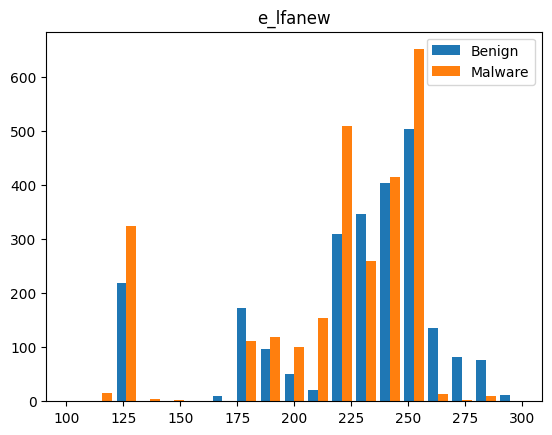

In [10]:
# Histogram penyebaran data benign dan malware pada fitur e_lfanew.
x = BenignData["e_lfanew"]
y = MalwareData["e_lfanew"]
bins = np.linspace(100, 300, 20) # Berbeda karena mayoritas data bernilai 100 sampai 300, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("e_lfanew")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

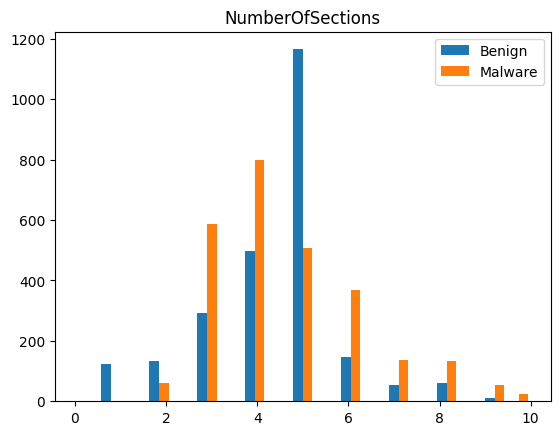

In [11]:
# Histogram penyebaran data benign dan malware pada fitur NumberOfSections.
x = BenignData["NumberOfSections"]
y = MalwareData["NumberOfSections"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("NumberOfSections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

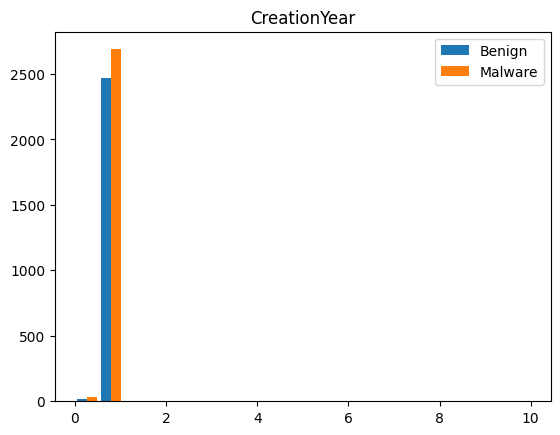

In [12]:
# Histogram penyebaran data benign dan malware pada fitur CreationYear.
x = BenignData["CreationYear"]
y = MalwareData["CreationYear"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("CreationYear")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

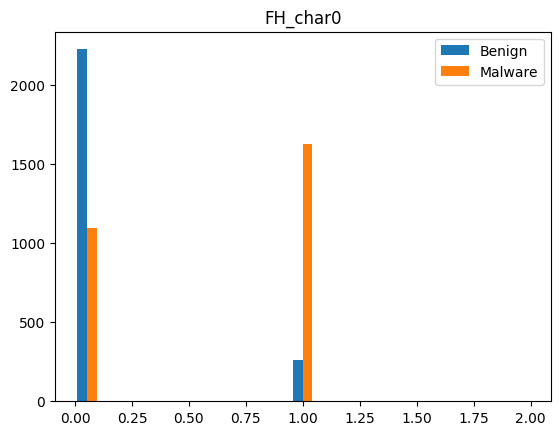

In [13]:
# Histogram penyebaran data benign dan malware pada fitur FH_char0.
x = BenignData["FH_char0"]
y = MalwareData["FH_char0"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char0")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

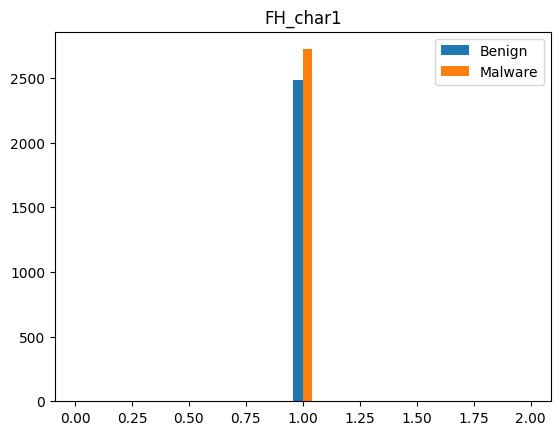

In [14]:
# Histogram penyebaran data benign dan malware pada fitur FH_char1.
x = BenignData["FH_char1"]
y = MalwareData["FH_char1"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char1")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

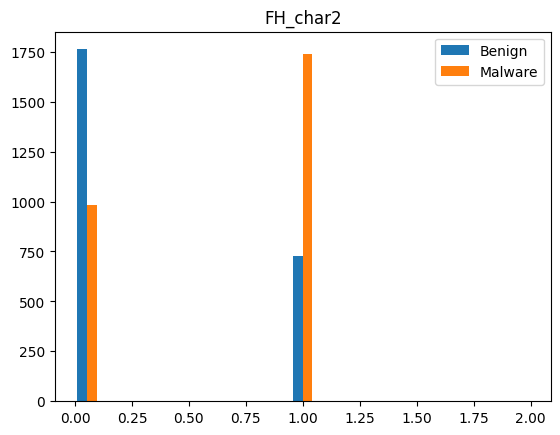

In [15]:
# Histogram penyebaran data benign dan malware pada fitur FH_char2.
x = BenignData["FH_char2"]
y = MalwareData["FH_char2"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char2")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

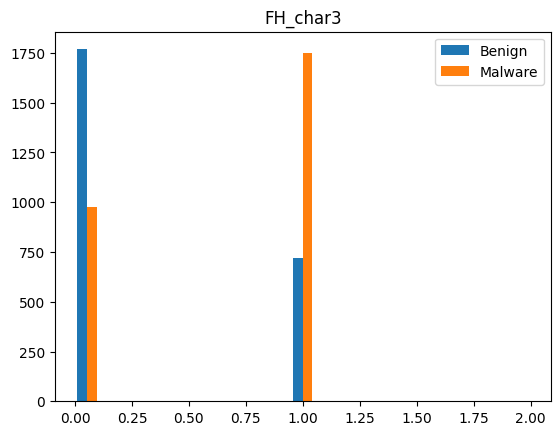

In [16]:
# Histogram penyebaran data benign dan malware pada fitur FH_char3.
x = BenignData["FH_char3"]
y = MalwareData["FH_char3"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char3")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

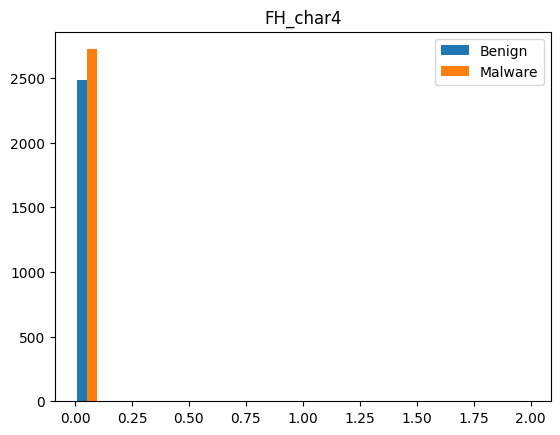

In [17]:
# Histogram penyebaran data benign dan malware pada fitur FH_char4.
x = BenignData["FH_char4"]
y = MalwareData["FH_char4"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char4")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

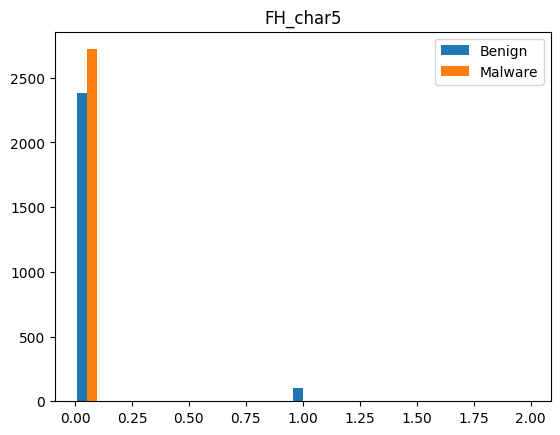

In [18]:
# Histogram penyebaran data benign dan malware pada fitur FH_char5.
x = BenignData["FH_char5"]
y = MalwareData["FH_char5"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char5")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

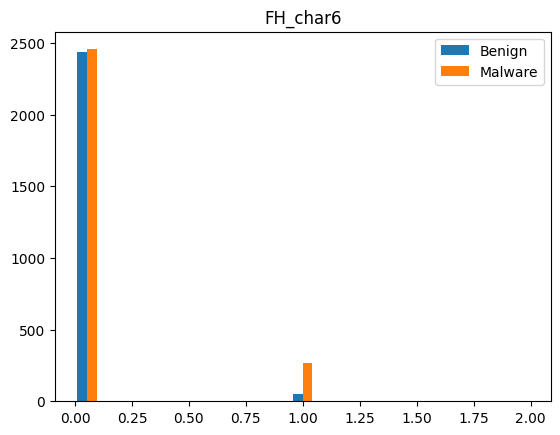

In [19]:
# Histogram penyebaran data benign dan malware pada fitur FH_char6.
x = BenignData["FH_char6"]
y = MalwareData["FH_char6"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char6")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

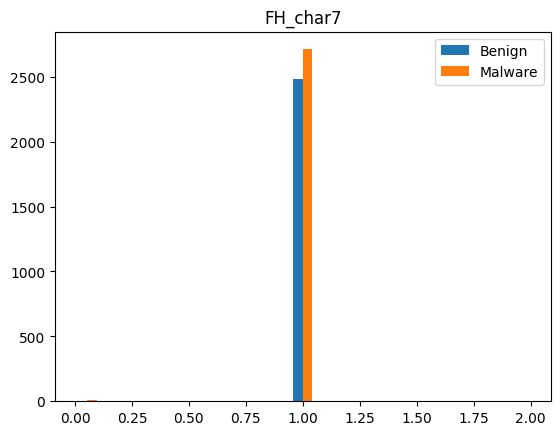

In [20]:
# Histogram penyebaran data benign dan malware pada fitur FH_char7.
x = BenignData["FH_char7"]
y = MalwareData["FH_char7"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char7")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

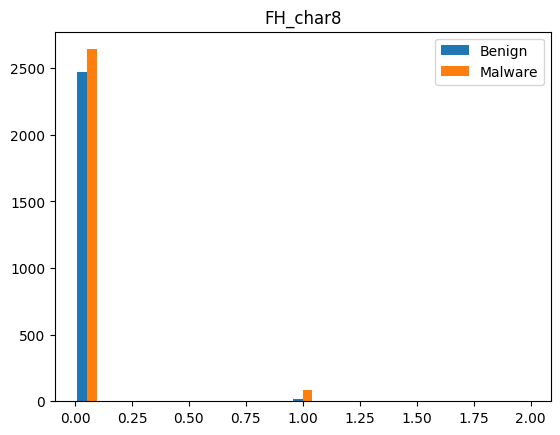

In [21]:
# Histogram penyebaran data benign dan malware pada fitur FH_char8.
x = BenignData["FH_char8"]
y = MalwareData["FH_char8"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char8")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

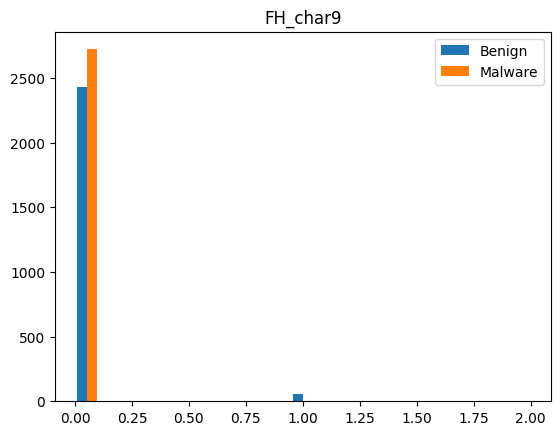

In [22]:
# Histogram penyebaran data benign dan malware pada fitur FH_char9.
x = BenignData["FH_char9"]
y = MalwareData["FH_char9"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char9")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

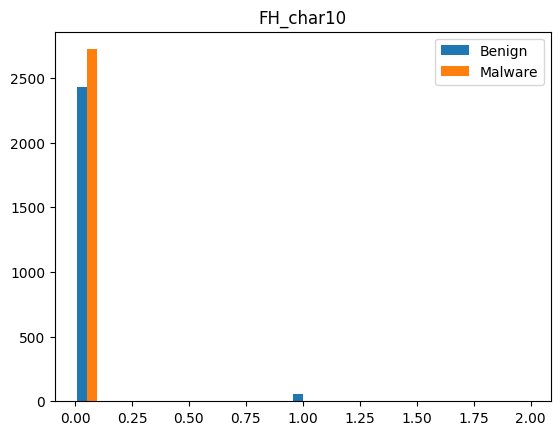

In [23]:
# Histogram penyebaran data benign dan malware pada fitur FH_char10.
x = BenignData["FH_char10"]
y = MalwareData["FH_char10"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char10")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

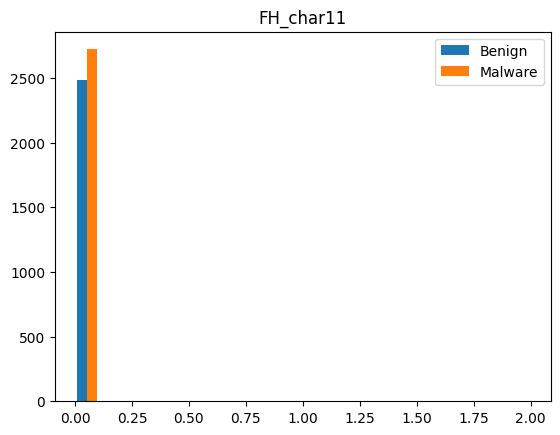

In [24]:
# Histogram penyebaran data benign dan malware pada fitur FH_char11.
x = BenignData["FH_char11"]
y = MalwareData["FH_char11"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char11")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

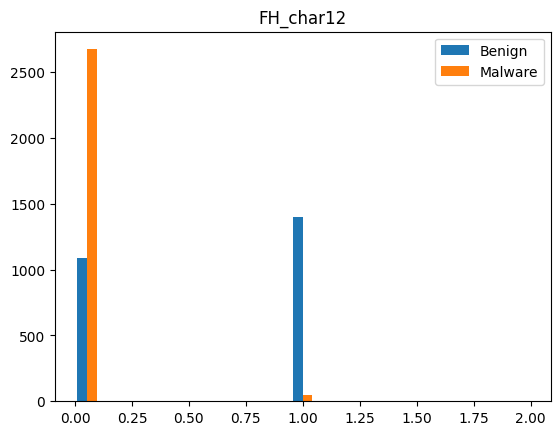

In [25]:
# Histogram penyebaran data benign dan malware pada fitur FH_char12.
x = BenignData["FH_char12"]
y = MalwareData["FH_char12"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char12")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

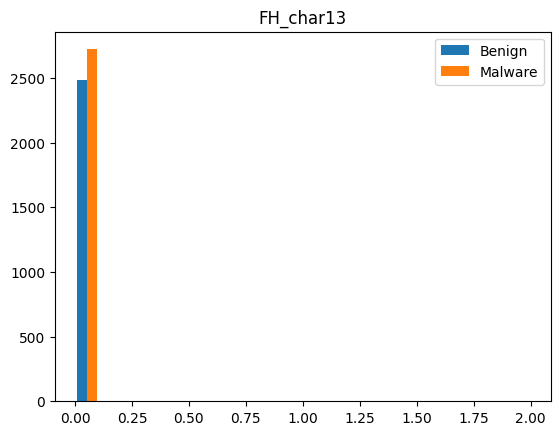

In [26]:
# Histogram penyebaran data benign dan malware pada fitur FH_char13.
x = BenignData["FH_char13"]
y = MalwareData["FH_char13"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char13")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

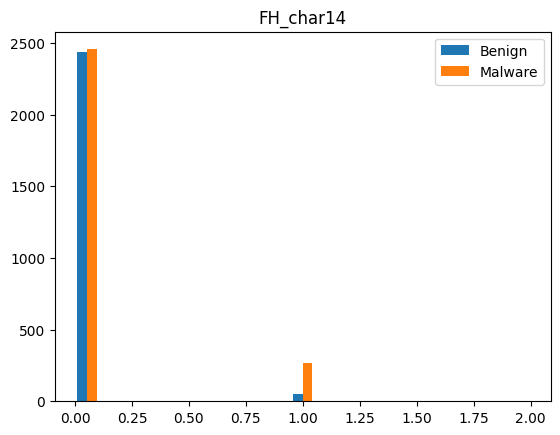

In [27]:
# Histogram penyebaran data benign dan malware pada fitur FH_char14.
x = BenignData["FH_char14"]
y = MalwareData["FH_char14"]
bins = np.linspace(0, 2, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FH_char14")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

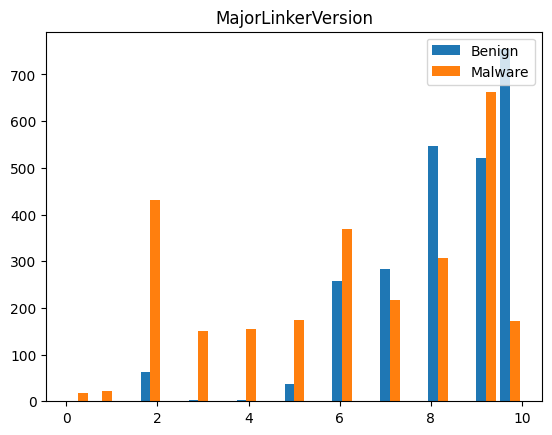

In [28]:
# Histogram penyebaran data benign dan malware pada fitur MajorLinkerVersion.
x = BenignData["MajorLinkerVersion"]
y = MalwareData["MajorLinkerVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MajorLinkerVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

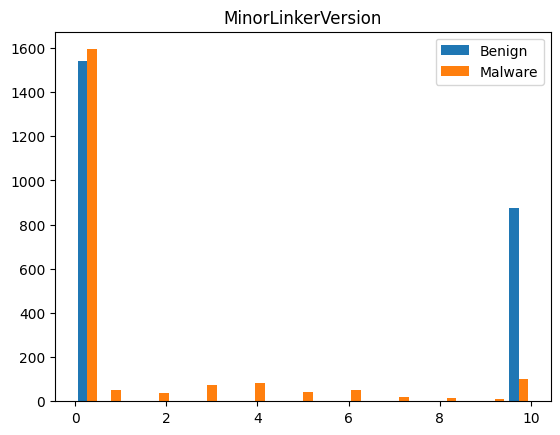

In [29]:
# Histogram penyebaran data benign dan malware pada fitur MinorLinkerVersion.
x = BenignData["MinorLinkerVersion"]
y = MalwareData["MinorLinkerVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MinorLinkerVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

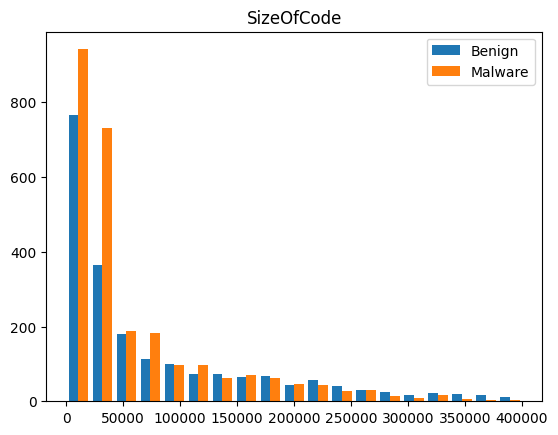

In [30]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfCode.
x = BenignData["SizeOfCode"]
y = MalwareData["SizeOfCode"]
bins = np.linspace(0, 400000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 400000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfCode")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

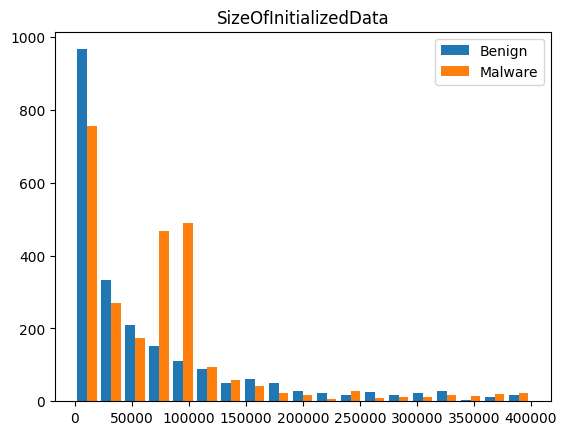

In [31]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfInitializedData.
x = BenignData["SizeOfInitializedData"]
y = MalwareData["SizeOfInitializedData"]
bins = np.linspace(0, 400000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 400000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfInitializedData")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

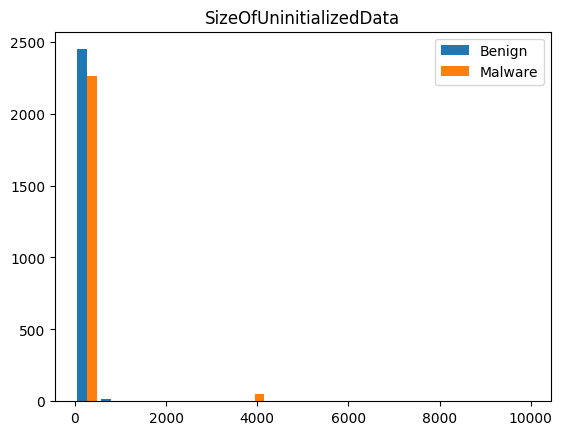

In [32]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfUninitializedData.
x = BenignData["SizeOfUninitializedData"]
y = MalwareData["SizeOfUninitializedData"]
bins = np.linspace(0, 10000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfUninitializedData")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

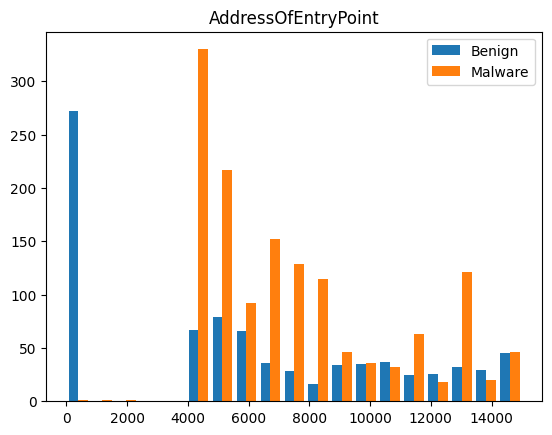

In [33]:
# Histogram penyebaran data benign dan malware pada fitur AddressOfEntryPoint.
x = BenignData["AddressOfEntryPoint"]
y = MalwareData["AddressOfEntryPoint"]
bins = np.linspace(0, 15000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 15000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("AddressOfEntryPoint")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

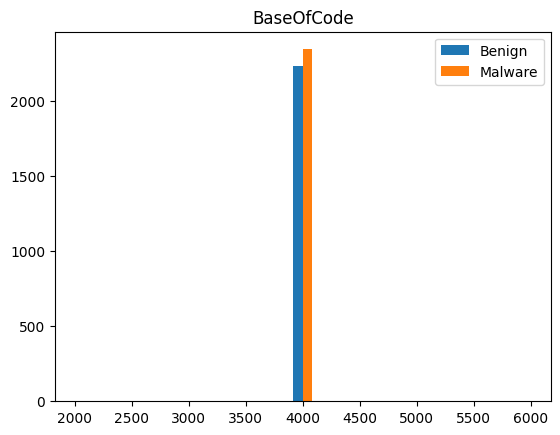

In [34]:
# Histogram penyebaran data benign dan malware pada fitur BaseOfCode.
x = BenignData["BaseOfCode"]
y = MalwareData["BaseOfCode"]
bins = np.linspace(2000, 6000, 20) # Berbeda karena mayoritas data bernilai 2000 sampai 6000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("BaseOfCode")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

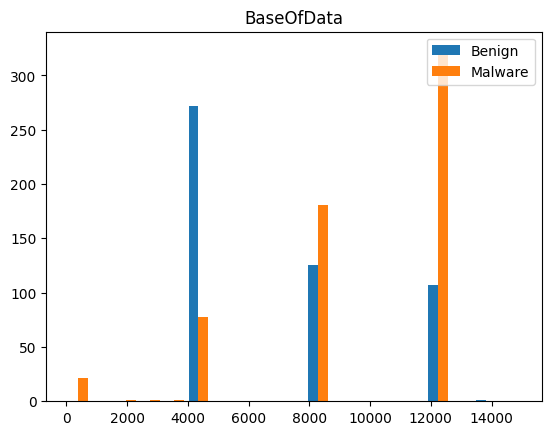

In [35]:
# Histogram penyebaran data benign dan malware pada fitur AddressOfEntryPoint.
x = BenignData["BaseOfData"]
y = MalwareData["BaseOfData"]
bins = np.linspace(0, 15000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 15000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("BaseOfData")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

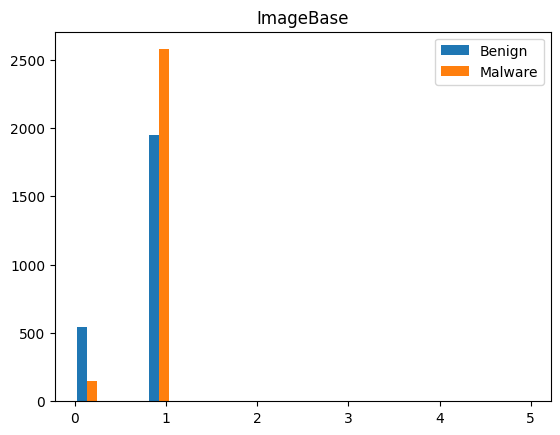

In [36]:
# Histogram penyebaran data benign dan malware pada fitur ImageBase.
x = BenignData["ImageBase"]
y = MalwareData["ImageBase"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ImageBase")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

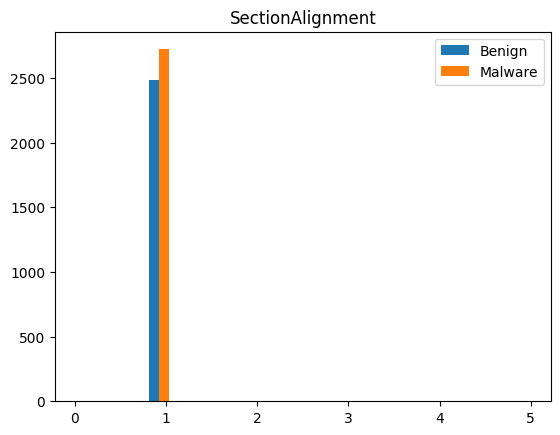

In [37]:
# Histogram penyebaran data benign dan malware pada fitur SectionAlignment.
x = BenignData["SectionAlignment"]
y = MalwareData["SectionAlignment"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SectionAlignment")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

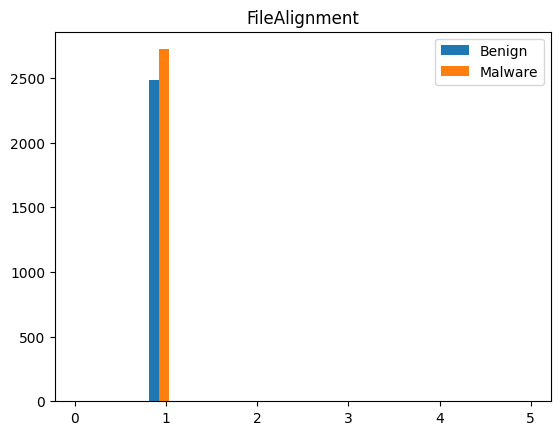

In [38]:
# Histogram penyebaran data benign dan malware pada fitur FileAlignment.
x = BenignData["FileAlignment"]
y = MalwareData["FileAlignment"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("FileAlignment")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

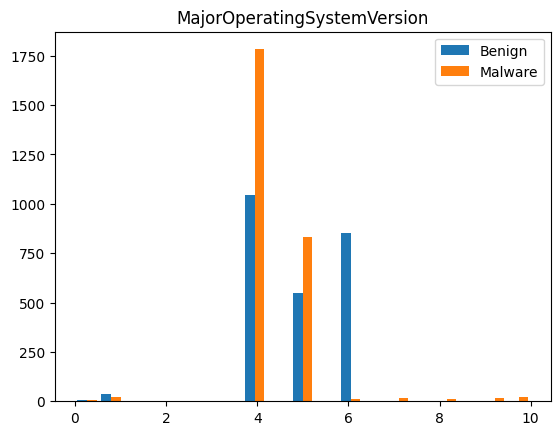

In [39]:
# Histogram penyebaran data benign dan malware pada fitur MajorOperatingSystemVersion.
x = BenignData["MajorOperatingSystemVersion"]
y = MalwareData["MajorOperatingSystemVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MajorOperatingSystemVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

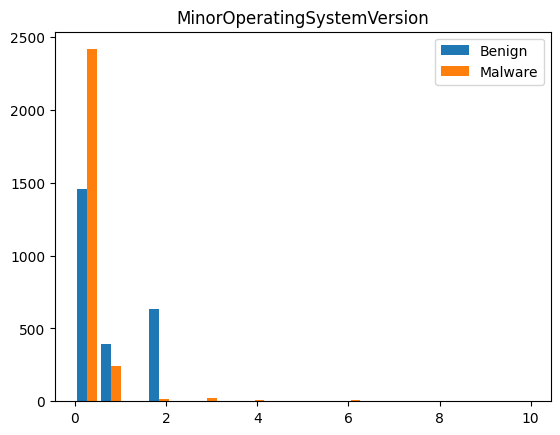

In [40]:
# Histogram penyebaran data benign dan malware pada fitur MinorOperatingSystemVersion.
x = BenignData["MinorOperatingSystemVersion"]
y = MalwareData["MinorOperatingSystemVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MinorOperatingSystemVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

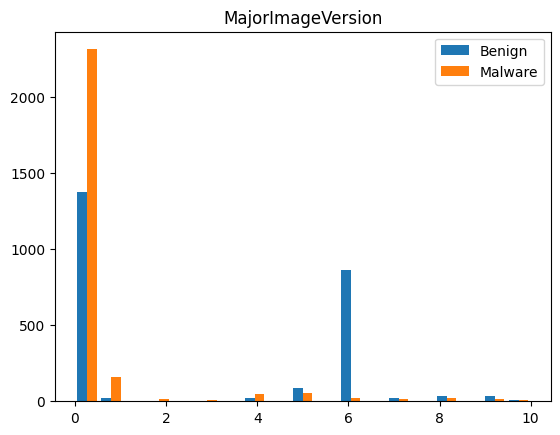

In [41]:
# Histogram penyebaran data benign dan malware pada fitur MajorImageVersion.
x = BenignData["MajorImageVersion"]
y = MalwareData["MajorImageVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MajorImageVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

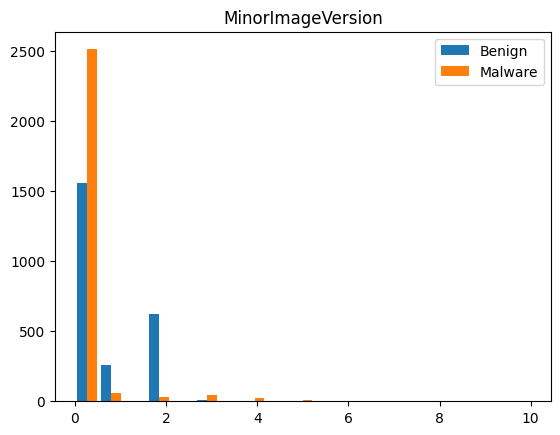

In [42]:
# Histogram penyebaran data benign dan malware pada fitur MinorImageVersion.
x = BenignData["MinorImageVersion"]
y = MalwareData["MinorImageVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MinorImageVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

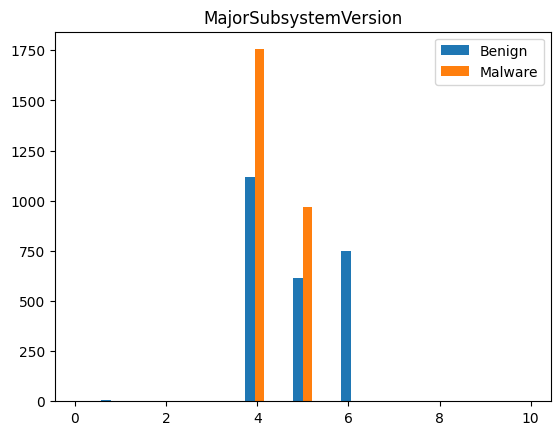

In [43]:
# Histogram penyebaran data benign dan malware pada fitur MajorSubsystemVersion.
x = BenignData["MajorSubsystemVersion"]
y = MalwareData["MajorSubsystemVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MajorSubsystemVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

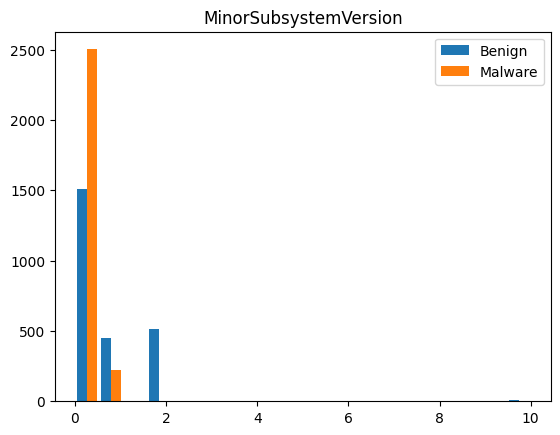

In [44]:
# Histogram penyebaran data benign dan malware pada fitur MinorSubsystemVersion.
x = BenignData["MinorSubsystemVersion"]
y = MalwareData["MinorSubsystemVersion"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("MinorSubsystemVersion")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

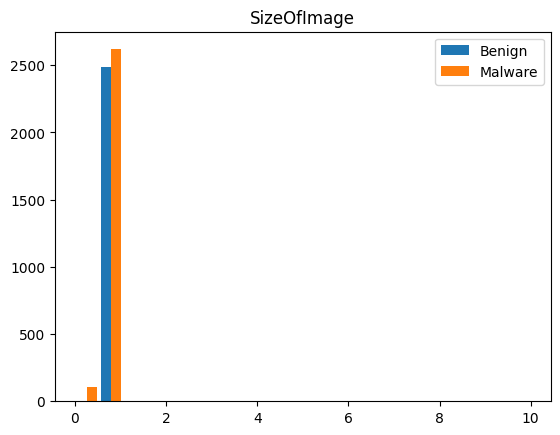

In [45]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfImage.
x = BenignData["SizeOfImage"]
y = MalwareData["SizeOfImage"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfImage")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

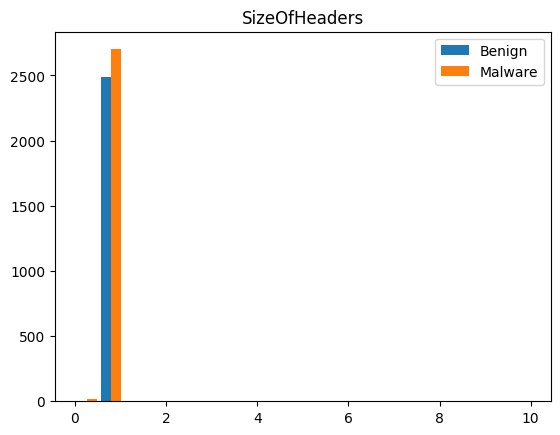

In [46]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfHeaders.
x = BenignData["SizeOfHeaders"]
y = MalwareData["SizeOfHeaders"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfHeaders")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

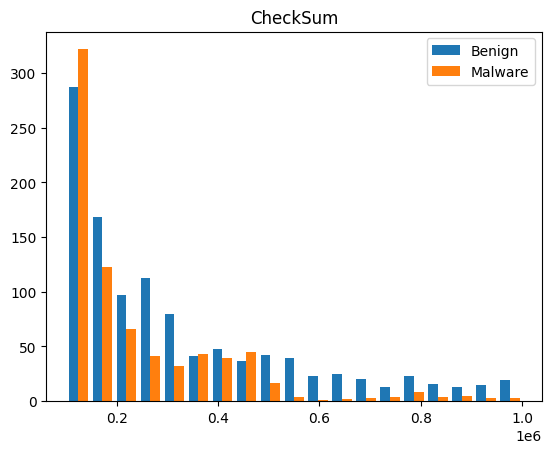

In [47]:
# Histogram penyebaran data benign dan malware pada fitur CheckSum.
x = BenignData["CheckSum"]
y = MalwareData["CheckSum"]
bins = np.linspace(100000, 1000000, 20) # Berbeda karena mayoritas data bernilai 100000 sampai 1000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("CheckSum")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

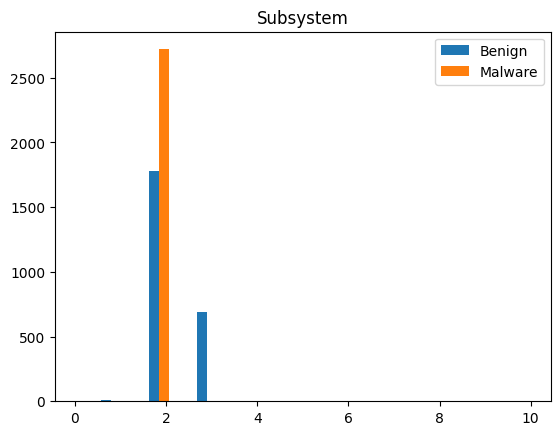

In [48]:
# Histogram penyebaran data benign dan malware pada fitur Subsystem.
x = BenignData["Subsystem"]
y = MalwareData["Subsystem"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Subsystem")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

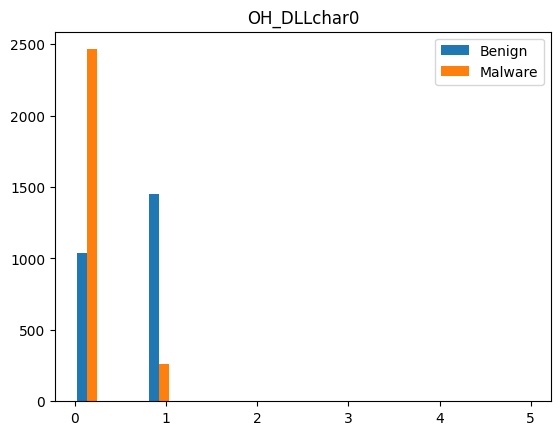

In [49]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar0.
x = BenignData["OH_DLLchar0"]
y = MalwareData["OH_DLLchar0"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar0")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

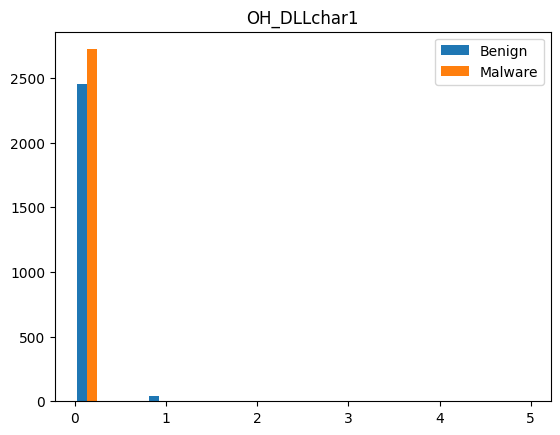

In [50]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar1.
x = BenignData["OH_DLLchar1"]
y = MalwareData["OH_DLLchar1"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar1")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

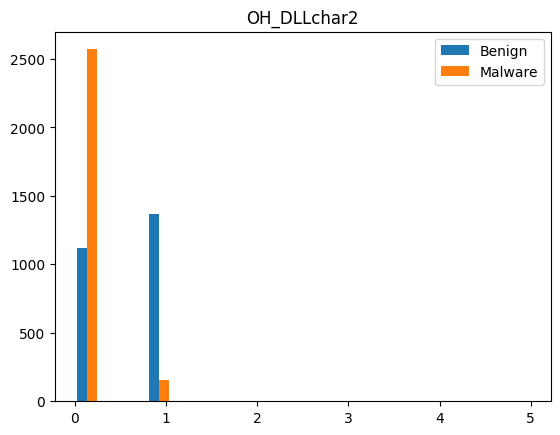

In [51]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar2.
x = BenignData["OH_DLLchar2"]
y = MalwareData["OH_DLLchar2"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar2")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

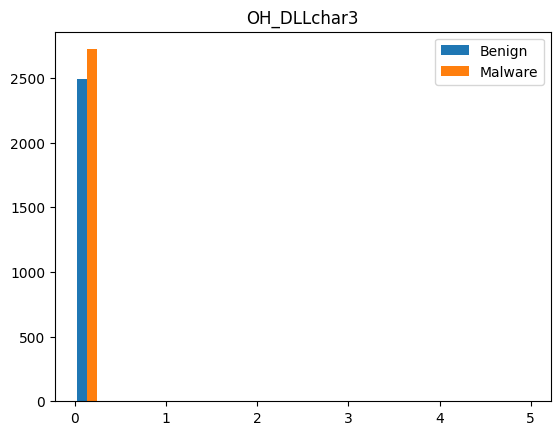

In [52]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar3.
x = BenignData["OH_DLLchar3"]
y = MalwareData["OH_DLLchar3"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar3")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

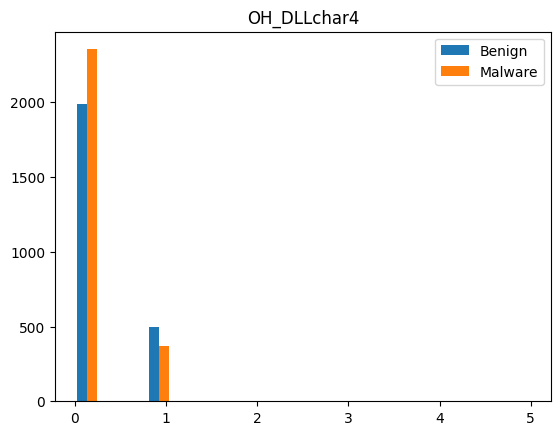

In [53]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar4.
x = BenignData["OH_DLLchar4"]
y = MalwareData["OH_DLLchar4"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar4")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

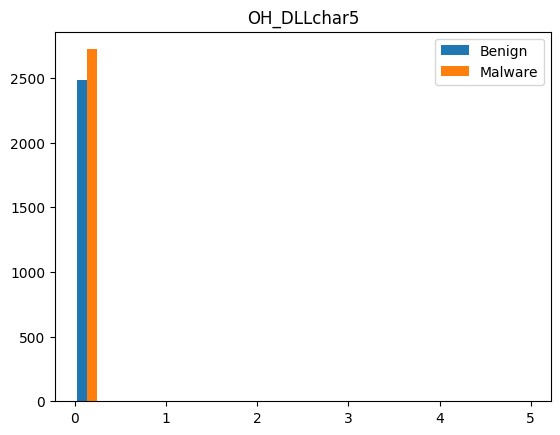

In [54]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar5.
x = BenignData["OH_DLLchar5"]
y = MalwareData["OH_DLLchar5"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar5")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

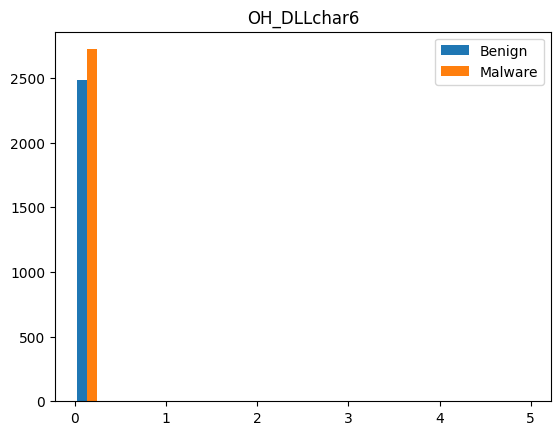

In [55]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar6.
x = BenignData["OH_DLLchar6"]
y = MalwareData["OH_DLLchar6"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar6")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

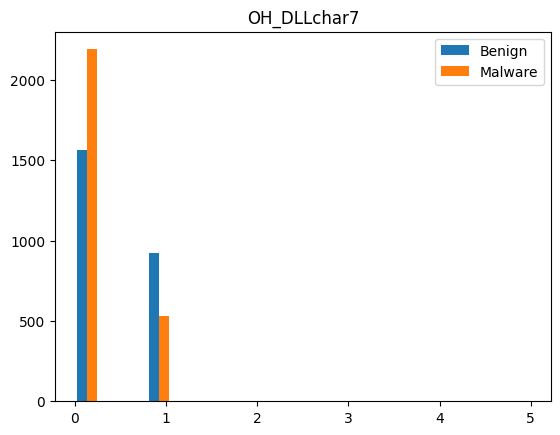

In [56]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar7.
x = BenignData["OH_DLLchar7"]
y = MalwareData["OH_DLLchar7"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar7")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

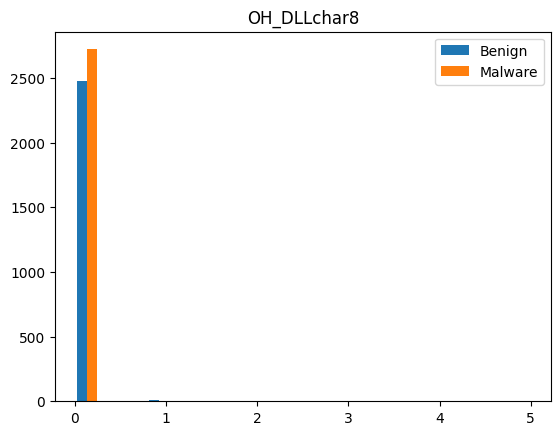

In [57]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar8.
x = BenignData["OH_DLLchar8"]
y = MalwareData["OH_DLLchar8"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar8")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

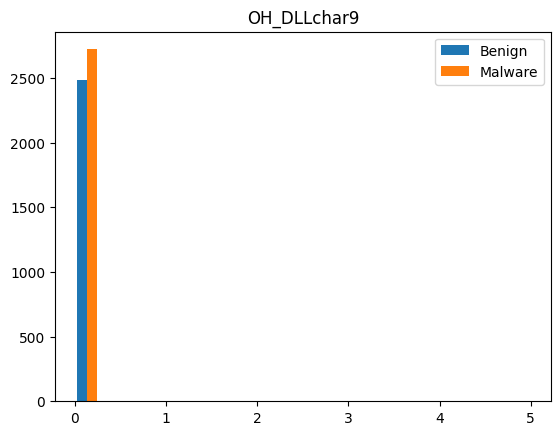

In [58]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar9.
x = BenignData["OH_DLLchar9"]
y = MalwareData["OH_DLLchar9"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar9")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

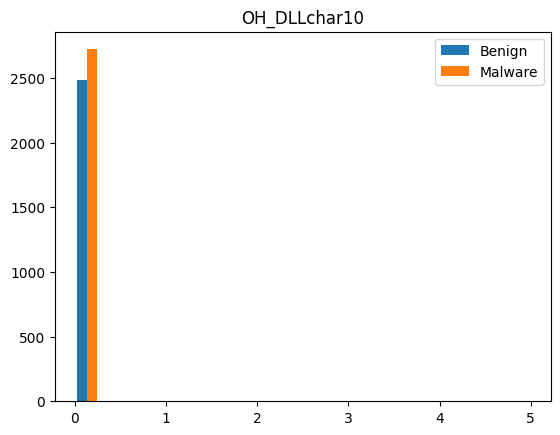

In [59]:
# Histogram penyebaran data benign dan malware pada fitur OH_DLLchar10.
x = BenignData["OH_DLLchar10"]
y = MalwareData["OH_DLLchar10"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OH_DLLchar10")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

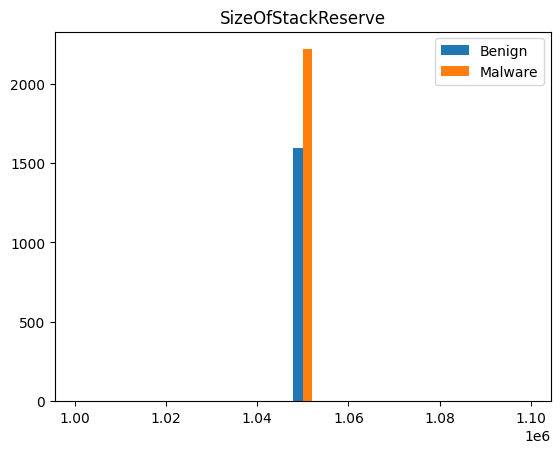

In [60]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfStackReserve.
x = BenignData["SizeOfStackReserve"]
y = MalwareData["SizeOfStackReserve"]
bins = np.linspace(1000000, 1100000, 20) # Berbeda karena mayoritas data bernilai 1000000 sampai 1100000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfStackReserve")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

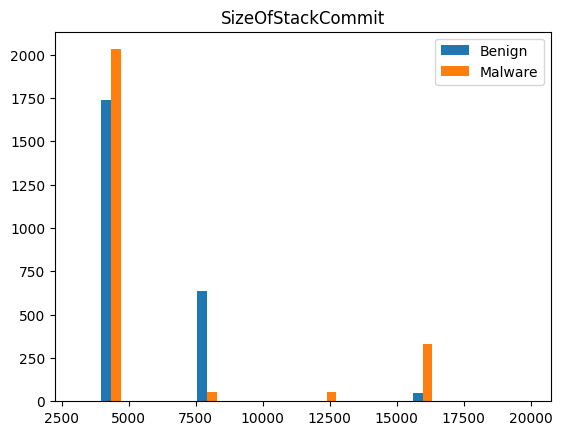

In [61]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfStackCommit.
x = BenignData["SizeOfStackCommit"]
y = MalwareData["SizeOfStackCommit"]
bins = np.linspace(3000, 20000, 20) # Berbeda karena mayoritas data bernilai 3000 sampai 20000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfStackCommit")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

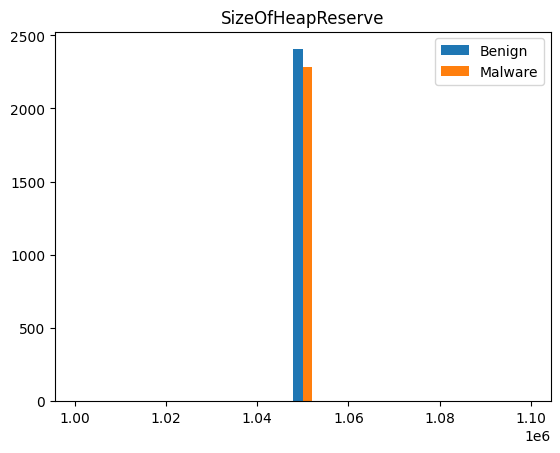

In [62]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfHeapReserve.
x = BenignData["SizeOfHeapReserve"]
y = MalwareData["SizeOfHeapReserve"]
bins = np.linspace(1000000, 1100000, 20) # Berbeda karena mayoritas data bernilai 1000000 sampai 1100000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfHeapReserve")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

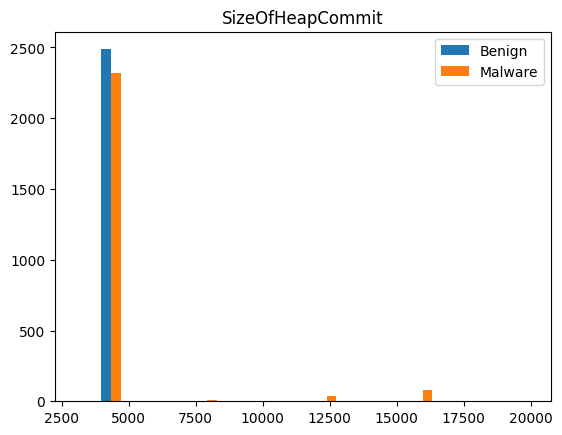

In [63]:
# Histogram penyebaran data benign dan malware pada fitur SizeOfHeapCommit.
x = BenignData["SizeOfHeapCommit"]
y = MalwareData["SizeOfHeapCommit"]
bins = np.linspace(3000, 20000, 20) # Berbeda karena mayoritas data bernilai 3000 sampai 20000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("SizeOfHeapCommit")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

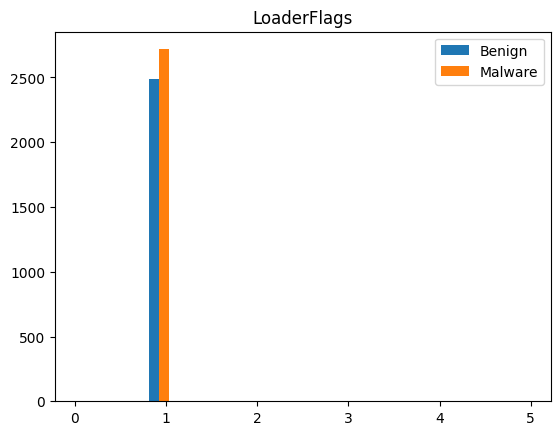

In [64]:
# Histogram penyebaran data benign dan malware pada fitur LoaderFlags.
x = BenignData["LoaderFlags"]
y = MalwareData["LoaderFlags"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("LoaderFlags")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

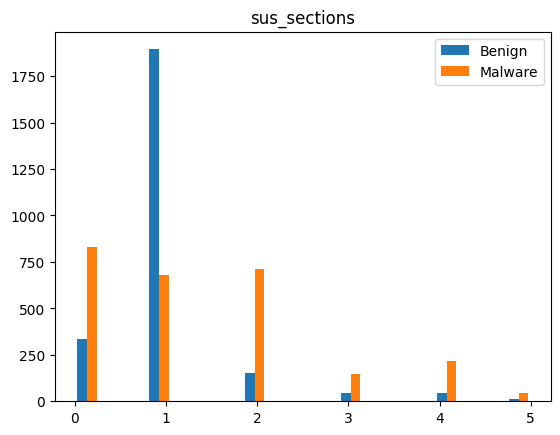

In [65]:
# Histogram penyebaran data benign dan malware pada fitur sus_sections.
x = BenignData["sus_sections"]
y = MalwareData["sus_sections"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("sus_sections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

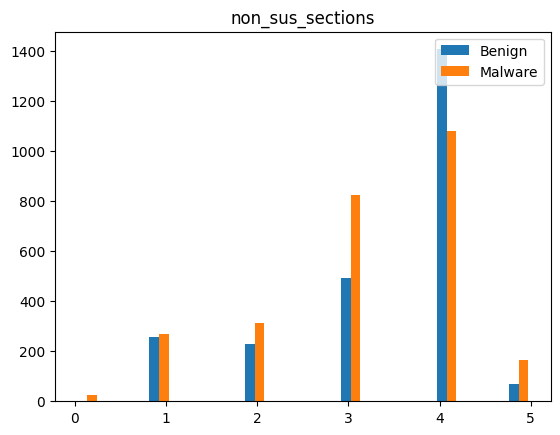

In [66]:
# Histogram penyebaran data benign dan malware pada fitur non_sus_sections.
x = BenignData["non_sus_sections"]
y = MalwareData["non_sus_sections"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("non_sus_sections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

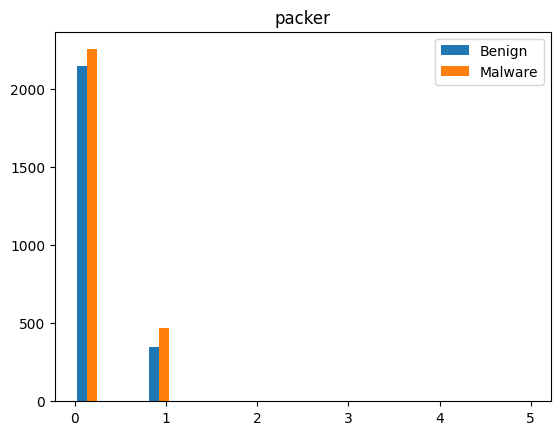

In [67]:
# Histogram penyebaran data benign dan malware pada fitur packer.
x = BenignData["packer"]
y = MalwareData["packer"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("packer")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

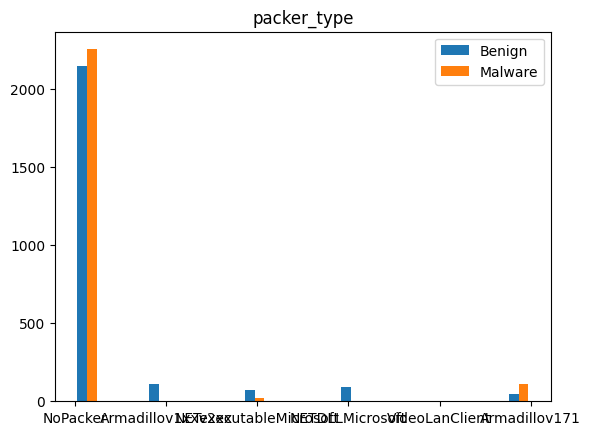

In [68]:
# Histogram penyebaran data benign dan malware pada fitur packer_type.
x = BenignData["packer_type"]
y = MalwareData["packer_type"]
bins = np.linspace(0, 5, 20) # Berbeda karena mayoritas data bernilai 0 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("packer_type")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

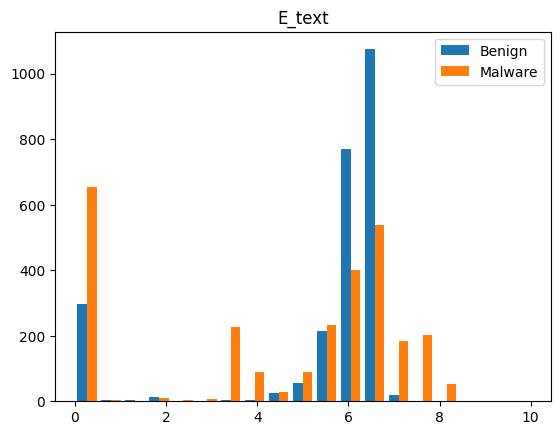

In [69]:
# Histogram penyebaran data benign dan malware pada fitur E_text.
x = BenignData["E_text"]
y = MalwareData["E_text"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("E_text")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

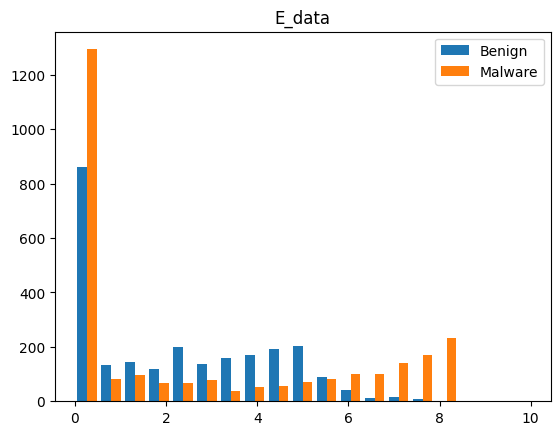

In [70]:
# Histogram penyebaran data benign dan malware pada fitur E_data.
x = BenignData["E_data"]
y = MalwareData["E_data"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("E_data")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

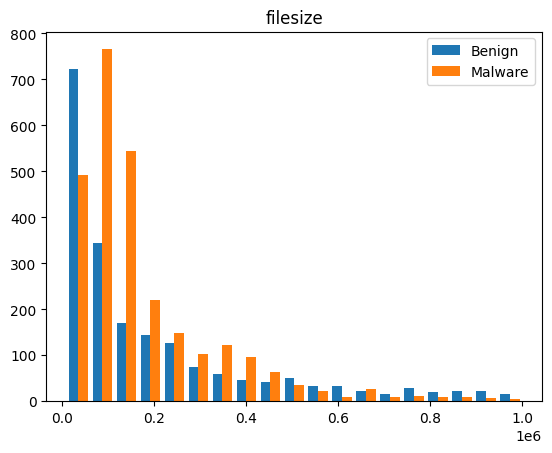

In [71]:
# Histogram penyebaran data benign dan malware pada fitur filesize.
x = BenignData["filesize"]
y = MalwareData["filesize"]
bins = np.linspace(10000, 1000000, 20) # Berbeda karena mayoritas data bernilai 10000 sampai 1000000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("filesize")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

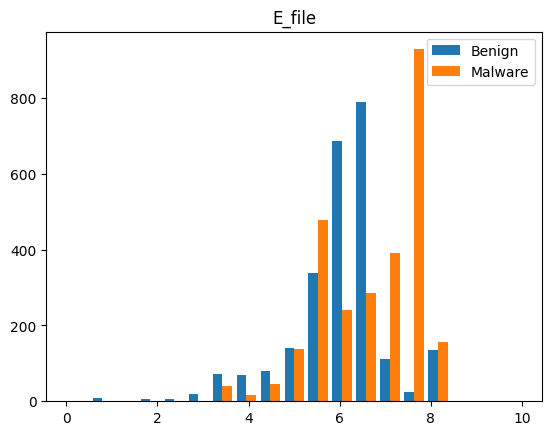

In [72]:
# Histogram penyebaran data benign dan malware pada fitur E_file.
x = BenignData["E_file"]
y = MalwareData["E_file"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("E_file")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

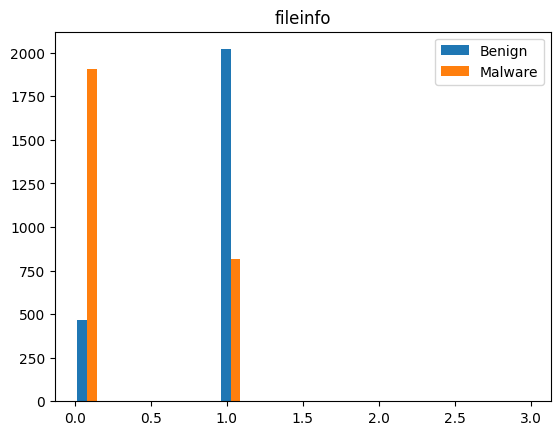

In [73]:
# Histogram penyebaran data benign dan malware pada fitur fileinfo.
x = BenignData["fileinfo"]
y = MalwareData["fileinfo"]
bins = np.linspace(0, 3, 20) # Berbeda karena mayoritas data bernilai 0 sampai 3, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("fileinfo")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

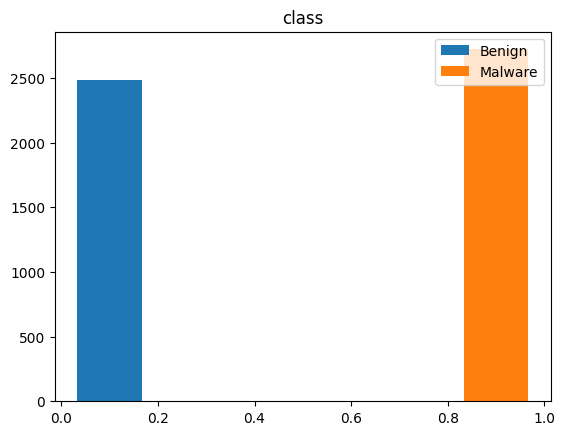

In [74]:
# Histogram penyebaran data benign dan malware pada fitur class.
x = BenignData["class"]
y = MalwareData["class"]
bins = np.linspace(0, 1, 4) # Berbeda karena mayoritas data bernilai 0 sampai 1, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("class")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [75]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['AddressOfEntryPoint', 'e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew', 'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2', 'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8', 'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13', 'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1', 'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9', 'OH_DLLchar10', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'sus_sections', 'non_sus_sections', 'packer', 'packer_type', 'E_data', 'filesize', 'E_file', 'fileinfo', 'class'],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['class'].values # CLass karena merepresentasikan binary class

In [76]:
# Memilih 100% data secara acak dari setiap fitur/column
sampled_data = DM.groupby('class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)

In [77]:
# Menampilkan list feature yang digunakan
Features = sampled_data.drop(['AddressOfEntryPoint', 'e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew', 'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2', 'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8', 'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13', 'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1', 'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9', 'OH_DLLchar10', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'sus_sections', 'non_sus_sections', 'packer', 'packer_type', 'E_data', 'filesize', 'E_file', 'fileinfo', 'class'],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")
for i, column_name in enumerate(Features):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 E_text                                   5210            float64


In [78]:
# Mencoba mencari threshold terbaik pada fitur yang dipilih
hasil_threshold = []

def Thresholding(threshold, feature):
    # Melakukan thresholding
    BenignDataThreshold = sampled_data[sampled_data[feature] > int(threshold)]
    MalwareDataThreshold = sampled_data[sampled_data[feature] <= int(threshold)]

    # menentukan TP, TN, FP, FN
    from sklearn.metrics import confusion_matrix

    # Untuk BenignDataThreshold
    y_true_benign = [0] * len(BenignDataThreshold)  # Label 0 untuk benign
    y_pred_benign = BenignDataThreshold["class"].astype(int)

    # Untuk MalwareDataThreshold
    y_true_malware = [1] * len(MalwareDataThreshold)  # Label 1 untuk malware
    y_pred_malware = MalwareDataThreshold["class"].astype(int) 

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung Precision, Recall, F1-score, dan Accuracy
    PrecisionThreshold = tp/(tp+fp) if (tp+fp) != 0 else 0
    RecallThreshold = tp/(tp+fn) if (tp+fn) != 0 else 0
    F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold)) if (PrecisionThreshold+RecallThreshold) != 0 else 0
    AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn) if (tp+fp+tn+fn) != 0 else 0

    matrix = [[feature, threshold], [PrecisionThreshold], [RecallThreshold], [F1ScoreThreshold], [AccuracyThreshold]]
    hasil_threshold.append(matrix)

for feature in tqdm(Features, desc='Progress'):
    Max = sampled_data[feature].max()
    Min = sampled_data[feature].min()

    for x in range(int(Min), int(Max + 1)):
        Thresholding(x, feature)

print(hasil_threshold)

Progress: 100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.82it/s]

[[['E_text', 0], [0.23916238060249817], [0.6881606765327696], [0.3549618320610687], [0.545873320537428]], [['E_text', 1], [0.24210139603232916], [0.6857440166493236], [0.3578604398588107], [0.5460652591170825]], [['E_text', 2], [0.2446730345334313], [0.6761421319796954], [0.35932020501753437], [0.5441458733205374]], [['E_text', 3], [0.24871418074944893], [0.679037111334002], [0.36407636461414355], [0.5460652591170825]], [['E_text', 4], [0.3633357825128582], [0.7503793626707133], [0.4896039603960397], [0.6042226487523993]], [['E_text', 5], [0.387582659808964], [0.7403508771929824], [0.5088015432843018], [0.609021113243762]], [['E_text', 6], [0.5389419544452608], [0.6326002587322122], [0.5820273755207299], [0.5955854126679463]], [['E_text', 7], [0.8600293901542984], [0.48608803986710963], [0.6211196603873707], [0.45182341650671787]]]


In [79]:
winner = [['', 0], [0], [0], [0], [0]]  # Format: [[feature, threshold], [precision], [recall], [f1-score], [accuracy]]

for result in hasil_threshold:
    if result[4][0] > winner[4][0]:
        winner = result

print(f"Dengan fitur {winner[0][0]} dan threshold {winner[0][1]}, menghasilkan akurasi {winner[4][0]} yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.")


Dengan fitur E_text dan threshold 5, menghasilkan akurasi 0.609021113243762 yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.


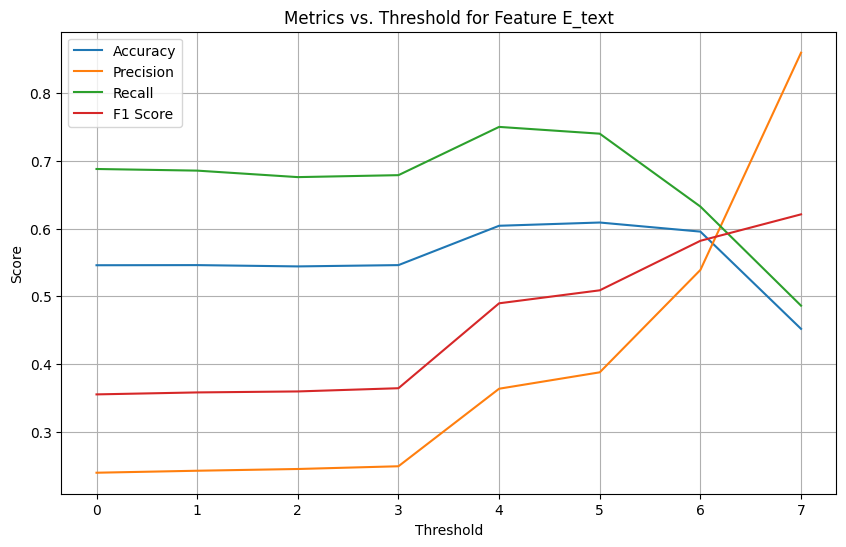

In [80]:
# Mendapatkan fitur pemenang dan thresholdnya
winner_feature, winner_threshold = winner[0]

# Memfilter hasil threshold untuk fitur pemenang
winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

# Pisahkan hasil menjadi list berdasarkan feature dan kolom
thresholds, precision, recall, f1_score, accuracy = [], [], [], [], []
for result in winner_results:
    thresholds.append(result[0][1])
    precision.append(result[1][0])
    recall.append(result[2][0])
    f1_score.append(result[3][0])
    accuracy.append(result[4][0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_score, label='F1 Score')

plt.title(f'Metrics vs. Threshold for Feature {winner_feature}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
